# Edge Detection

![Task](pics/task.jpg)

* https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/

In [1]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
%matplotlib inline

In [26]:
tiger = cv.imread('pics/tiger.png', 0)
wolf = cv.imread('pics/wolf.jpg', 0)

# Roberts Operator

* Mark edge point only
* No information about edge orientation
* Work best with binary images
* Primary disadvantage:
  * High sensitivity to noise
  * Few pixels are used to approximate the gradient
  
$$
\sqrt{\left[ I(r, c) - I(r - 1, c - 1) \right]^2 + \left[ I(r, c - 1) - I(r - 1, c) \right]^2}
$$

$$
\left| I(r, c) - I(r - 1, c - 1) \right| + \left| I(r, c - 1) - I(r - 1, c) \right|
$$

$$
h_1 = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix},
h_2 = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}
$$

# Sobel Operator

* Looks for edges in both horizontal and vertical directions, then combine the information into a single metric.
* The masks are as follows:

$$
x = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix},
y = \begin{bmatrix}
-1 & -2 & -1 \\
0  & 0  & 0 \\
1  & 2  & 1
\end{bmatrix}
$$

$$
Edge Magnitude = \sqrt{x^2 + y^2}, Edge Direction = \tan^{-1}\frac{y}{x}
$$ 

# Prewitt Operator

* Similar to the Sobel, with different mask coefficients:

$$
x = \begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix},
y = \begin{bmatrix}
-1 & -1 & -1 \\
0  & 0  & 0 \\
1  & 1  & 1
\end{bmatrix}
$$

$$
Edge Magnitude = \sqrt{x^2 + y^2}, Edge Direction = \tan^{-1}\frac{y}{x}
$$ 

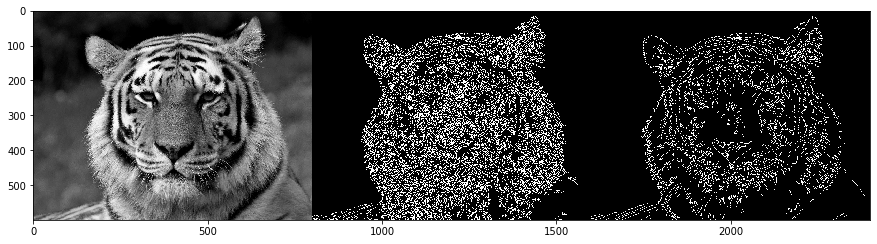

In [38]:
# Smoothing without removing edges.
gray_filtered = cv.bilateralFilter(tiger, 7, 50, 50)

# Applying the canny filter
edges = cv.Canny(tiger, 40, 200)
edges_filtered = cv.Canny(gray_filtered, 60, 120)

# Stacking the images to print them together for comparison
images = np.hstack((tiger, edges, edges_filtered))

# Display the resulting frame
plt.figure(figsize=(15, 5))
plt.imshow(images, cmap='gray', vmin=0, vmax=255)